In [1]:
######## Find Optimal Decision Boundary Threshold for Models

# Loads model's weights
# Using validation dataset, find optimal threshold
# Test final accuracy on test dataset

Import All Required Modules

In [3]:
import sys

# Manually add the project root to sys.path
sys.path.append('/Users/joaquinuriarte/Documents/GitHub/sports-betting/')

# === STEP 0: Imports
print("# === STEP 0: Imports: Starting ...")
from modules.model_manager.trainer.trainer import Trainer
from modules.model_manager.predictor.predictor import Predictor
from modules.model_manager.factories.model_factory import ModelFactory
from modules.model_manager.helpers.configuration_loader import ConfigurationLoader as MMConfigLoader
from modules.model_manager.model_manager import ModelManager
print("# === STEP 0: Imports: Complete")

# === STEP 0: Imports: Starting ...


2025-01-23 10:07:13.180382: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# === STEP 0: Imports: Complete


In [4]:
# === STEP 1: Dependency Instantiations And Global Variable Declarations
print("# === STEP 1: Dependency Instantiations And Global Variable Declarations: Starting ...")
## === MODEL MANAGER
yaml_path0 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_000.yaml'
yaml_path1 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_001.yaml'
yaml_path2 = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/configs/model_v01/model_v01_002.yaml'

yaml_paths = [yaml_path0, yaml_path1]

checkpoint = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/models'
trainer = Trainer(checkpoint)
predictor = Predictor()
model_factory = ModelFactory()
mm_configuration_loader = MMConfigLoader()
print("# === STEP 1: Dependency Instantiations And Global Variable Declarations: Complete")

# === STEP 1: Dependency Instantiations And Global Variable Declarations: Starting ...
# === STEP 1: Dependency Instantiations And Global Variable Declarations: Complete


Load Val, and Test Datasets into Memory

In [5]:
import pickle
import os

# File path to load train, test, and val datasets
train_test_val_dataset_path = "/Users/joaquinuriarte/Documents/GitHub/sports-betting/processed_datasets/model_v01"


test_dataset_path = train_test_val_dataset_path + "/test.pkl"

with open(test_dataset_path, "rb") as f:
    test_dataset = pickle.load(f)
    print("Test dataset leaded to memory")

Test dataset leaded to memory


Load Models

In [6]:
## For all YAMLS, get their model's signatures
import yaml

yaml_path_list = [yaml_path2]
signatures = []

for yaml_file in yaml_path_list:
    with open(yaml_file, "r") as file:
        config_data = yaml.safe_load(file)

    # Save model signature 
    signatures.append(config_data.get("model", {}).get("model_signature"))

## Using model's signatures, get model's weights path
weights_paths =[]

for signature in signatures:
    base_path = '/Users/joaquinuriarte/Documents/GitHub/sports-betting/z-model_binaries/model_v0.1/models/'
    base_file_name = '/model_weights_'

    directory = base_path + signature
    file_name = base_file_name + signature + ".pth"

    final_file_path = directory + file_name

    weights_paths.append(final_file_path) 

In [7]:
# === STEP 4: MODEL MANAGER
model_manager = ModelManager(trainer, predictor, model_factory, mm_configuration_loader)
models = model_manager.load_models([yaml_path2], weights_paths)
print("Models successfully loaded ")

Models successfully loaded 


Predict on Test Set

In [8]:
predictions = []
for model in models:
    predictions.append(model.predict(test_dataset.examples, return_target_labels=True))

total_examples = 0
correct_predictions = 0

for prediction in predictions:
    for row in prediction.itertuples(index=False):
        total_examples += 1

        # Compare predictions and target labels for the current feature
        if (row.final_score_A > row.final_score_B and row.target_final_score_A > row.target_final_score_B) or \
        (row.final_score_A < row.final_score_B and row.target_final_score_A < row.target_final_score_B):
            correct_predictions += 1

    # Calculate accuracy
    accuracy = correct_predictions / total_examples
    print(f"Accuracy across all features on test dataset: {accuracy}")

Accuracy across all features on test dataset: 0.5871102960440137


In [9]:
total_examples = 0
correct_predictions = 0
correct_b_predictions = 0

for row in predictions[0].itertuples(index=False):
    print(row)
#     total_examples += 1
    
#     # Compare predictions and target labels for the current feature
#     if (row.final_score_A > row.final_score_B and row.target_final_score_A > row.target_final_score_B):
#         correct_predictions += 1
#     elif (row.final_score_A < row.final_score_B and row.target_final_score_A < row.target_final_score_B):
#         correct_predictions += 1
#         correct_b_predictions += 1  

# # Calculate accuracy
# accuracy = correct_predictions / total_examples
# percent_of_b_in_total_correct_pred = correct_b_predictions / correct_predictions
# print(f"Accuracy across all features on validation dataset: {accuracy} and percent_of_b_in_total_correct_pred: {percent_of_b_in_total_correct_pred}")

Pandas(final_score_A=106.05768585205078, final_score_B=106.35191345214844, target_final_score_A=108.0, target_final_score_B=115.0)
Pandas(final_score_A=97.88880157470703, final_score_B=97.08341979980469, target_final_score_A=103.0, target_final_score_B=94.0)
Pandas(final_score_A=103.83797454833984, final_score_B=99.23739624023438, target_final_score_A=108.0, target_final_score_B=105.0)
Pandas(final_score_A=111.43476104736328, final_score_B=107.74172973632812, target_final_score_A=86.0, target_final_score_B=117.0)
Pandas(final_score_A=109.81245422363281, final_score_B=108.40766906738281, target_final_score_A=123.0, target_final_score_B=109.0)
Pandas(final_score_A=106.0184326171875, final_score_B=106.6052017211914, target_final_score_A=98.0, target_final_score_B=102.0)
Pandas(final_score_A=98.35511779785156, final_score_B=95.48030853271484, target_final_score_A=111.0, target_final_score_B=100.0)
Pandas(final_score_A=104.52734375, final_score_B=104.20361328125, target_final_score_A=110.0,

In [15]:
y_pred = predictions[0].drop(columns = ["target_final_score_A", "target_final_score_B"])
y_label = predictions[0].drop(columns = ["final_score_A", "final_score_B"])

In [17]:
from sklearn.metrics import f1_score
f1_score(y_pred, y_label)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass-multioutput targets

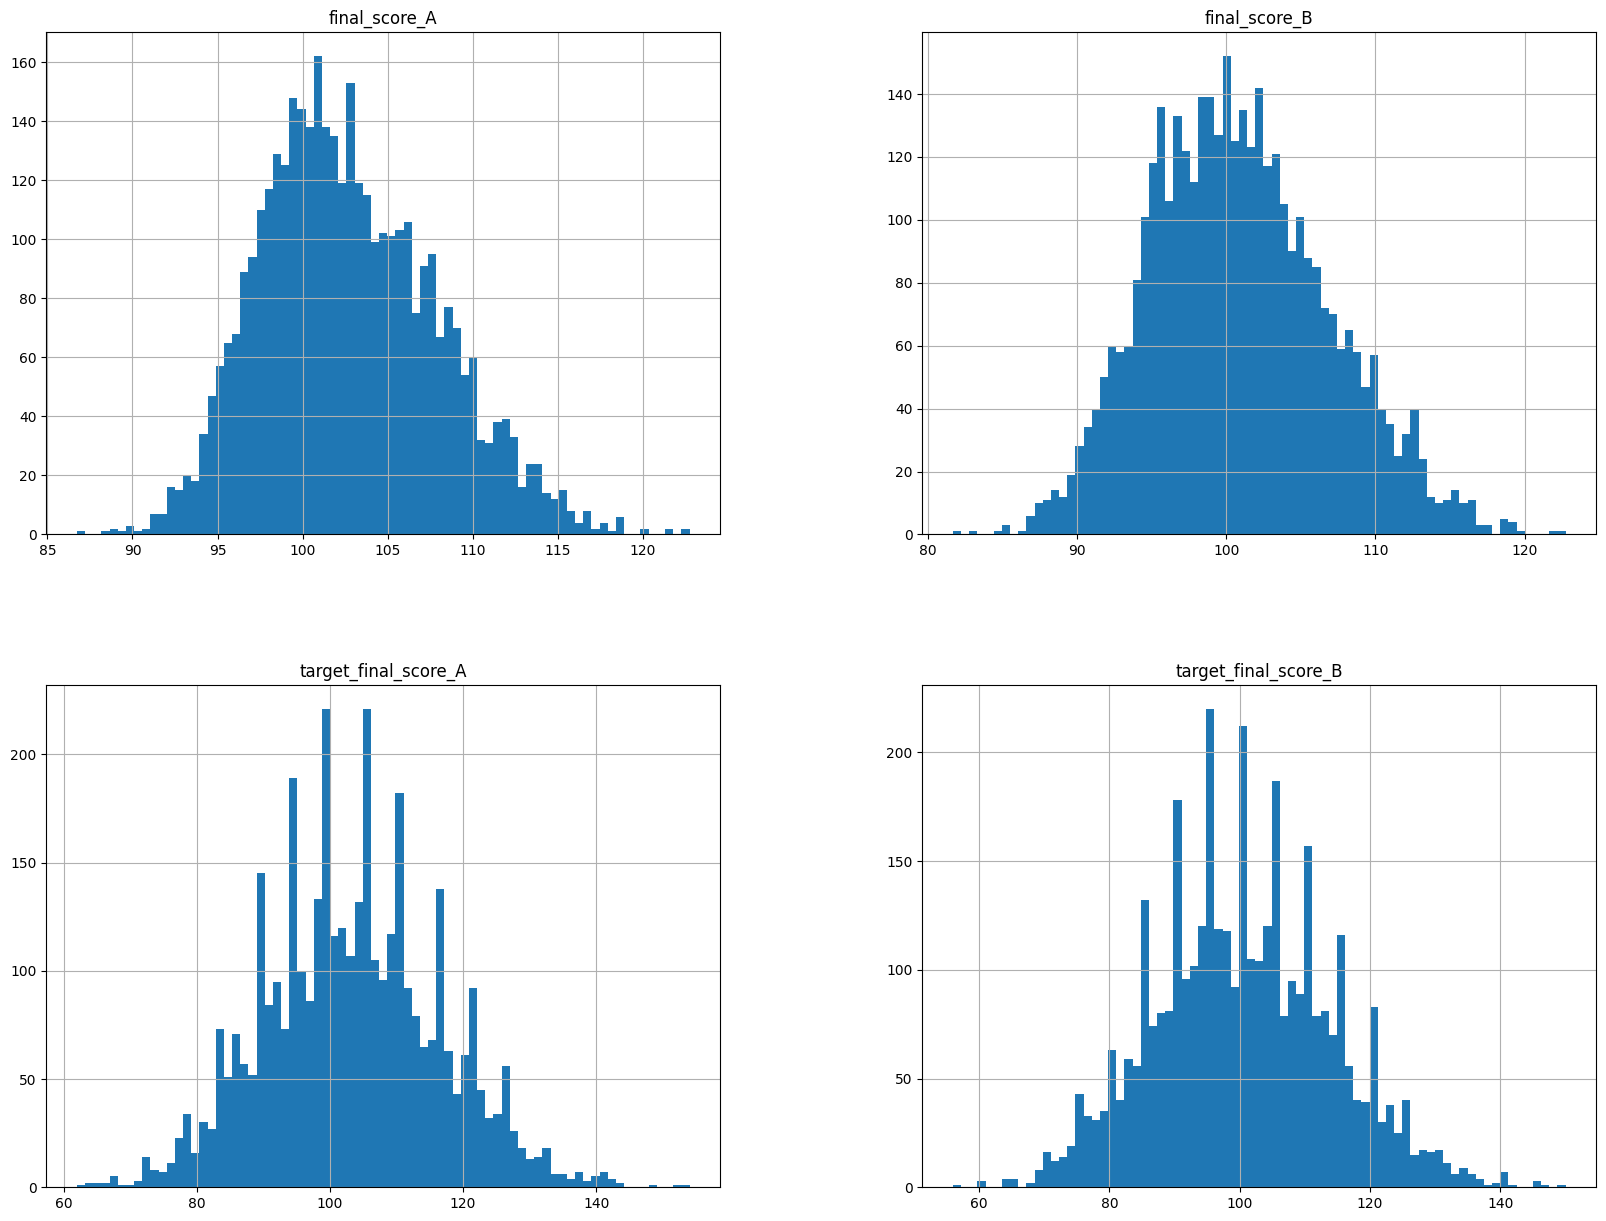

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
predictions[0].hist(bins=75, figsize=(20,15))
plt.show()